## Final Project Submission

Please fill out:
* Student name: Nick Catalano, Alaska Lam, Zach Paul
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Amber Yandow
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

In [2]:
#Import python libraries.
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

# Map plotting libraries
##pip install gmaps
import gmaps

## Importing data and EDTA

In [3]:
#Importing data
file_name = 'kc_house_data.csv'
df = pd.read_csv(file_name, index_col = 0)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
#Inspecting data
df.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

In [6]:
#Cleaning Data
df = pd.read_csv(file_name, index_col=0)
df['date_month'] = pd.to_datetime(df['date']).dt.month
df['date_year'] = pd.to_datetime(df['date']).dt.year
df['floors'] = df['floors'].astype(int)
df['waterfront'] = df['waterfront'].fillna(0).astype(int)
df['view'] = df['view'].fillna(0).astype(int)

for i in range(len(df['sqft_basement'])):
    if df['sqft_basement'].iloc[i] == '?':
        df['sqft_basement'].iloc[i] = (df['sqft_living'].iloc[i] - df['sqft_above'].iloc[i])

df['sqft_basement'] = df['sqft_basement'].astype(float)
df['yr_renovated'] = df['yr_renovated'].fillna(0).astype(int)
df.drop('date', axis = 1, inplace = True)

In [7]:
#pd.plotting.scatter_matrix(df, figsize=(20, 20))
#plt.show()

# Questions:
#   Can one model fit all the data?
#        Does it make sense to split the date into two more accurate models.

#   How does # of size of house (bedrooms / bathrooms / number of floors) impact house prices?

#   How does location, specifically zipcode, affect price?

#   What is the relationship between zipcode and grade?

# Asumption on data:

#Cool ideas?
# - Price heat map


In [8]:
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
date_month       0
date_year        0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  int64  
 6   waterfront     21597 non-null  int64  
 7   view           21597 non-null  int64  
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   21597 non-null  int64  
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64

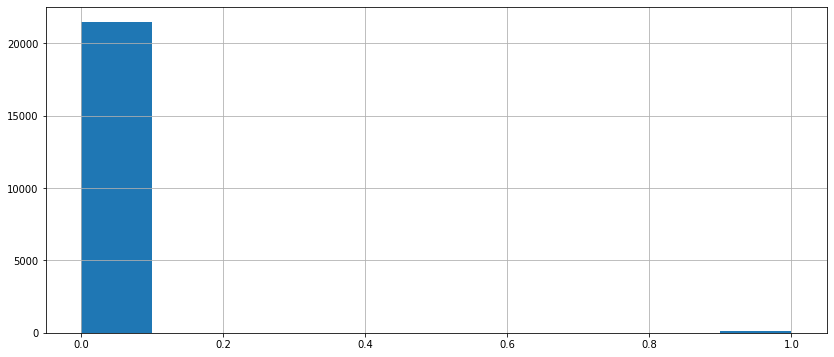

In [10]:
#Columns which have missing data; 'waterfront', 'view', 'yr_renovated'
df['waterfront'].hist(figsize=[14,6])

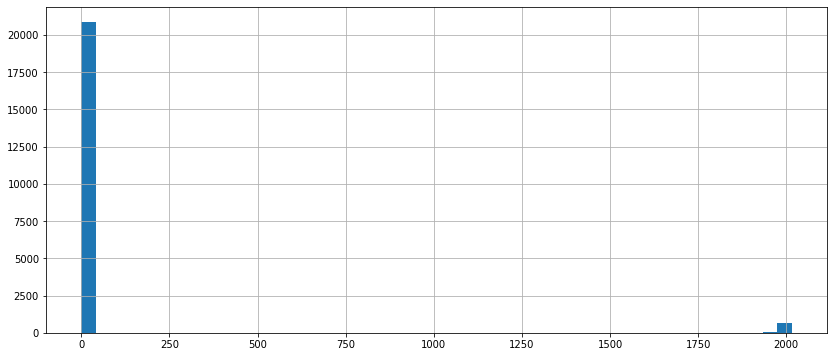

In [11]:
df['yr_renovated'].hist(bins = 50, figsize=[14,6])

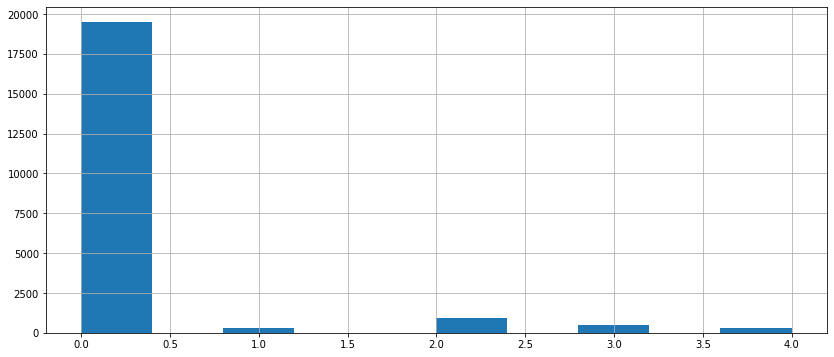

In [12]:
df['view'].hist(figsize=[14,6])

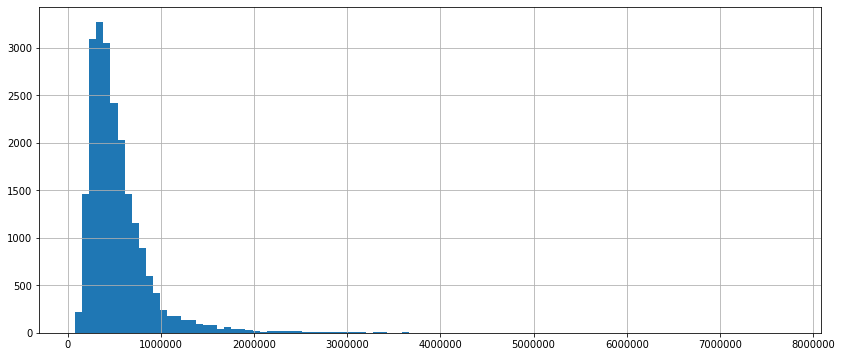

In [13]:
df['price'].hist(bins = 100, figsize=[14,6])

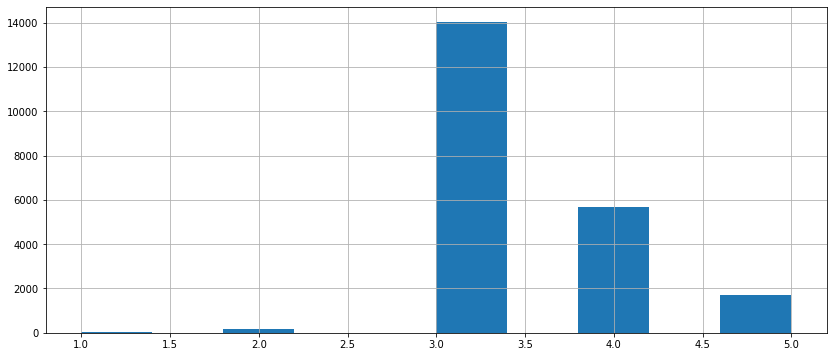

In [14]:
df['condition'].hist(figsize=[14,6])

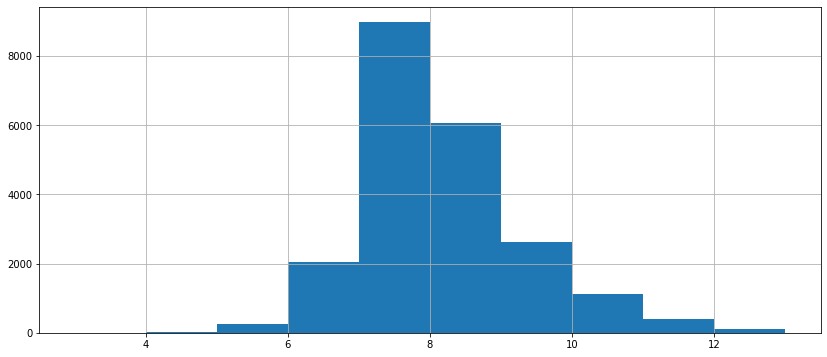

In [15]:
df['grade'].hist(figsize=[14,6])